<a href="https://colab.research.google.com/github/pedroigp/FIAP-Tech-Challenge-Fase1/blob/main/Tech_Challenge_Fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POSTECH IA para DEVs - Tech Challenge - IADT - Fase 1**

Grupo:
1. Eric Alves Fontoura
2. Joao Carlos Peixoto A Costa
3. Natália de Souza
4. Pedro Ivo Guimarães Póvoa
5. Leonardo Monteiro Costa Martins

# O Problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo
seguro de saúde.

# Tarefas
**Exploração de dados:**
* Carregue a base de dados e explore suas características.
* Analise estatísticas descritivas e visualize distribuições relevantes.

**Pré-processamento de dados:**
* Realize a limpeza dos dados, tratando valores ausentes (se
necessário).
* Converta variáveis categóricas em formatos adequados para
modelagem.

**Modelagem:**
* Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo, Regressão Linear, Árvores de Decisão etc).
* Divida o conjunto de dados em conjuntos de treinamento e teste.

**Treinamento e avaliação do modelo:**
* Treine o modelo com o conjunto de treinamento.

**Validação estatística:**
* Utilize métricas estatísticas para validar a eficácia do modelo (p-value,
intervalos de confiança).

# O que avaliaremos:
* Apresente resultados visuais, como gráficos de previsões vs. valores reais.
* Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

**Observações:**
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

# Importar as bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1 Exploração de Dados
* Carregue a base de dados e explore suas características.
* Analise estatísticas descritivas e visualize distribuições relevantes.

Fonte: [Kaggle.com](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)

## Colunas
* **Age**: Idade da pessoa segurada
* **Sex**: Sexo biológico (male ou female) da pessoa segurada
* **BMI** (Body mass index): IMC em português, índice de massa corportal, a razão entre peso e altura.
* **Children**: Número de dependentes cobertos (filhos).
* **Smoker**: Indica se o segurado é **fumante** ou não (yes ou no)
* **Região**: Área geográfica da cobertura do plano.
* **Charges**: Custos de `health insurance` (seguro saúde, plano de saúde) por pessoa segurada.



In [ ]:
# Carregando os dados em um dataframe
original_dataset = pd.read_csv('/content/sample_data/insurance.csv')
original_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.1 Descrição dos dados

Importante para verificar se temos valores anômalos. `age` e `children` são valores discretos. Vemos que o a idade máxima é 64 anos e a mínima 18, e o número de filhos varia entre 0 e 5. Podemos concluir que os dados não são discrepantes.

O `BMI` (IMC) normal é entre 18,5 e 25, valores acima de 30 podem indicar sobrepeso ou obesidade ([mais detalhes neste link](https://mundoeducacao.uol.com.br/saude-bem-estar/imc.htm)).[link text](https://)

É possível que tenhamos valores discrepantes em `charges`, já que no quartil 75% temos o valor de 16.639 e o valor máximo de 63.770

In [ ]:
original_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Verificar valores nulos
original_dataset.isnull().sum()
# o resultado indica que não tem dados nulos

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Verificar o shape do dataset (quantas linhas e quantas colunas)
original_dataset.shape

(1338, 7)

In [ ]:
# Informações básicas dos dados do dataframe
original_dataset.info()
# temos tipos float, int e object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analisando os valores possíveis dos dados texto

In [ ]:
# Ver quantas categorias existem nos campos textos
set(original_dataset["sex"])

{'female', 'male'}

In [ ]:
set(original_dataset["smoker"])

{'no', 'yes'}

In [ ]:
set(original_dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

Analisando a distribuição dos dados textos

In [ ]:
# Ver quantidade por categoria
original_dataset["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
original_dataset["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
original_dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


## 1.2 Distribuição dos valores de charges (valores dos custos)

In [ ]:
# Distribuição básica dos dados nos grupos categóricos
pd.set_option('display.max_columns', None)
original_dataset.groupby('sex').describe()

age                                                         bmi  \
        count       mean        std   min   25%   50%    75%   max  count   
sex                                                                         
female  662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0  662.0   
male    676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0  676.0   

                                                                       \
             mean       std     min     25%      50%       75%    max   
sex                                                                     
female  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07   
male    30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13   

       children                                              charges  \
          count      mean       std  min  25%  50%  75%  max   count   
sex                                                                    
female    662.0  1.074018  1.192115  0.0  0.0  1.0  2.0  5.0   662.0   
male      676.0  1.115385  1.218986  0.0  0.0  1.0  2.0  5.0   676.0   

                                                                      \
                mean           std        min        25%         50%   
sex                                                                    
female  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                                   
                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309

In [ ]:
original_dataset.groupby('region').describe()

age                                                         bmi  \
           count       mean        std   min    25%   50%   75%   max  count   
region                                                                         
northeast  324.0  39.268519  14.069007  18.0  27.00  39.5  51.0  64.0  324.0   
northwest  325.0  39.196923  14.051646  19.0  26.00  39.0  51.0  64.0  325.0   
southeast  364.0  38.939560  14.164585  18.0  26.75  39.0  51.0  64.0  364.0   
southwest  325.0  39.455385  13.959886  19.0  27.00  39.0  51.0  64.0  325.0   

                                                                          \
                mean       std     min       25%    50%       75%    max   
region                                                                     
northeast  29.173503  5.937513  15.960  24.86625  28.88  32.89375  48.07   
northwest  29.199785  5.136765  17.385  25.74500  28.88  32.77500  42.94   
southeast  33.355989  6.477648  19.800  28.57250  33.33  37.81250  53.13   
southwest  30.596615  5.691836  17.400  26.90000  30.30  34.60000  47.60   

          children                                              charges  \
             count      mean       std  min  25%  50%  75%  max   count   
region                                                                    
northeast    324.0  1.046296  1.198949  0.0  0.0  1.0  2.0  5.0   324.0   
northwest    325.0  1.147692  1.171828  0.0  0.0  1.0  2.0  5.0   325.0   
southeast    364.0  1.049451  1.177276  0.0  0.0  1.0  2.0  5.0   364.0   
southwest    325.0  1.141538  1.275952  0.0  0.0  1.0  2.0  5.0   325.0   

                                                                             \
                   mean           std        min          25%           50%   
region                                                                        
northeast  13406.384516  11255.803066  1694.7964  5194.322288  10057.652025   
northwest  12417.575374  11072.276928  1621.3402  4719.736550   8965.795750   
southeast  14735.411438  13971.098589  1121.8739  4440.886200   9294.131950   
southwest  12346.937377  11557.179101  1241.5650  4751.070000   8798.593000   

                                    
                  75%          max  
region                              
northeast  16687.3641  58571.07448  
northwest  14711.7438  60021.39897  
southeast  19526.2869  63770.42801  
southwest  13462.5200  52590.82939

In [ ]:
original_dataset.groupby('smoker').describe()

age                                                          bmi  \
         count       mean        std   min    25%   50%   75%   max   count   
smoker                                                                        
no      1064.0  39.385338  14.083410  18.0  26.75  40.0  52.0  64.0  1064.0   
yes      274.0  38.514599  13.923186  18.0  27.00  38.0  49.0  64.0   274.0   

                                                                     children  \
             mean       std     min       25%      50%    75%    max    count   
smoker                                                                          
no      30.651795  6.043111  15.960  26.31500  30.3525  34.43  53.13   1064.0   
yes     30.708449  6.318644  17.195  26.08375  30.4475  35.20  52.58    274.0   

                                                    charges                \
            mean       std  min  25%  50%  75%  max   count          mean   
smoker                                                                      
no      1.090226  1.218136  0.0  0.0  1.0  2.0  5.0  1064.0   8434.268298   
yes     1.113139  1.157066  0.0  0.0  1.0  2.0  5.0   274.0  32050.231832   

                                                                           \
                 std         min           25%          50%           75%   
smoker                                                                      
no       5993.781819   1121.8739   3986.438700   7345.40530  11362.887050   
yes     11541.547176  12829.4551  20826.244213  34456.34845  41019.207275   

                     
                max  
smoker               
no      36910.60803  
yes     63770.42801

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

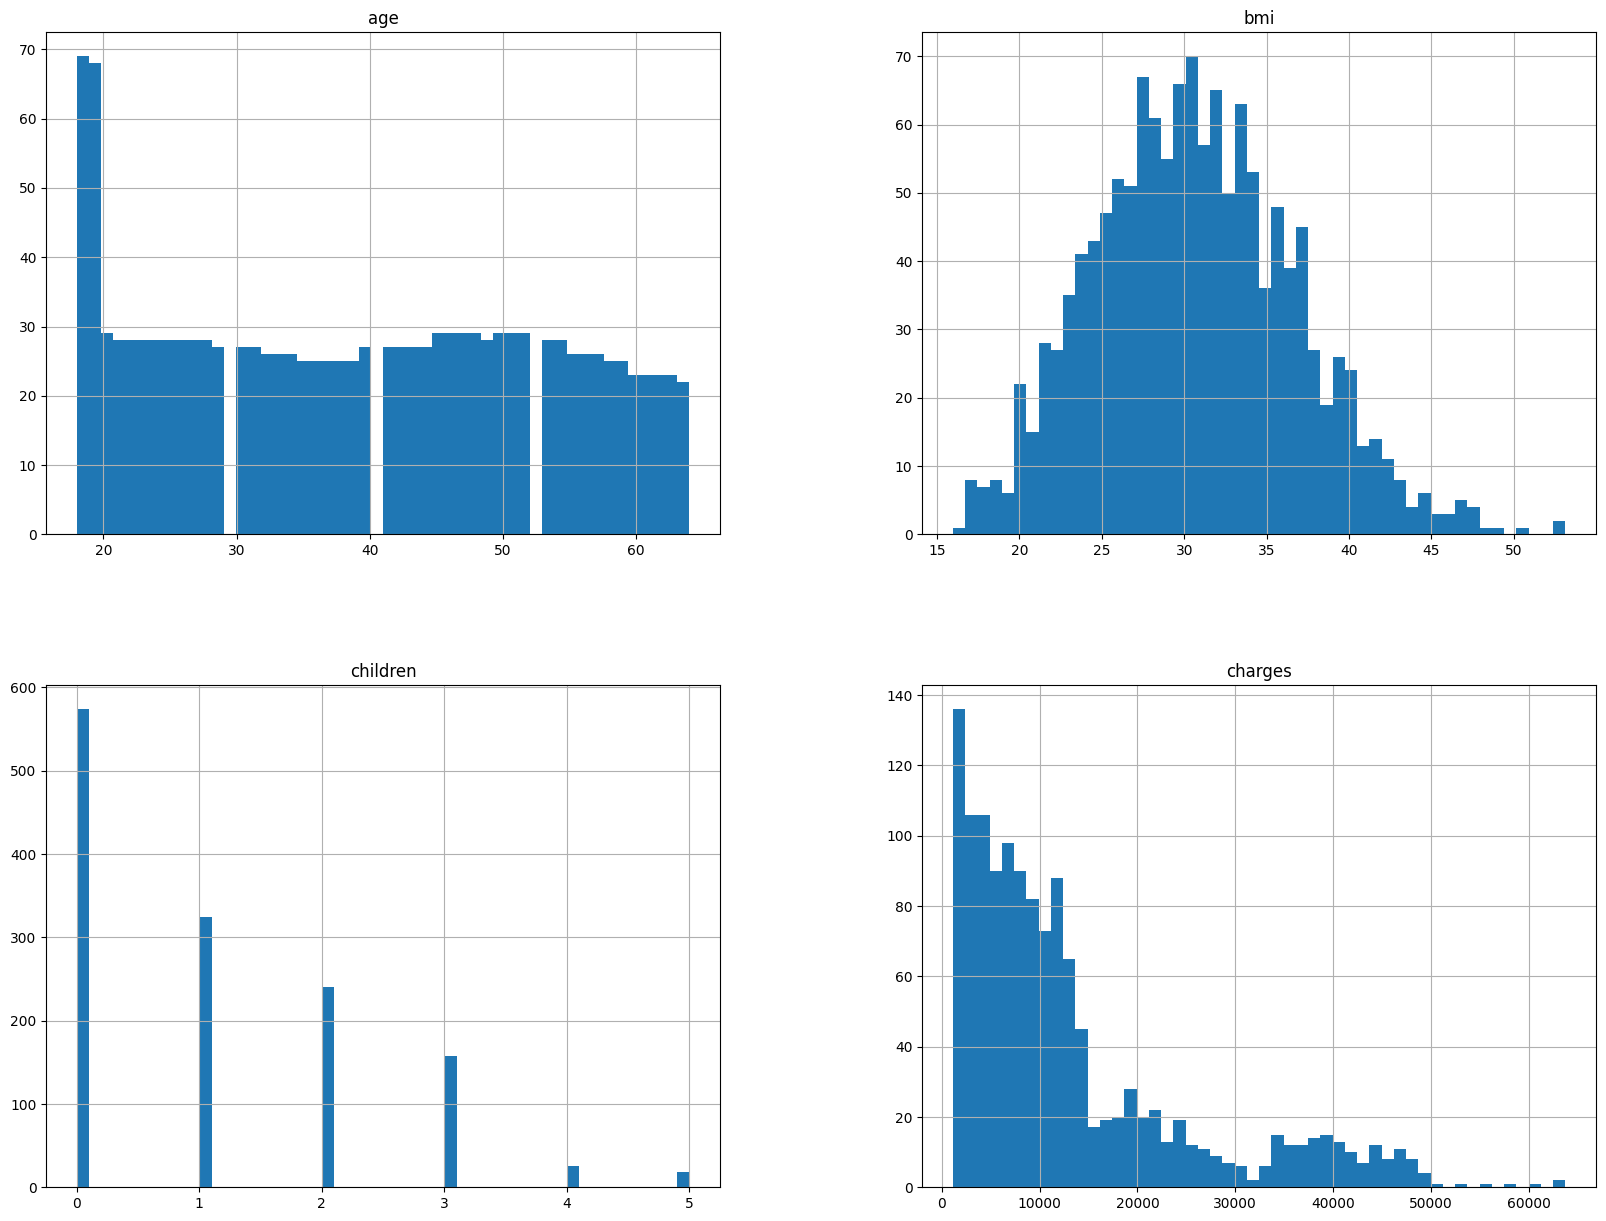

In [ ]:
# Forma gráfica
#Histogram
#To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed,
#outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed,
#it indicates the presence of extreme values or outliers.
# Analisando as distribuições com histogramas:
original_dataset.hist(bins=50, figsize=(20,15))

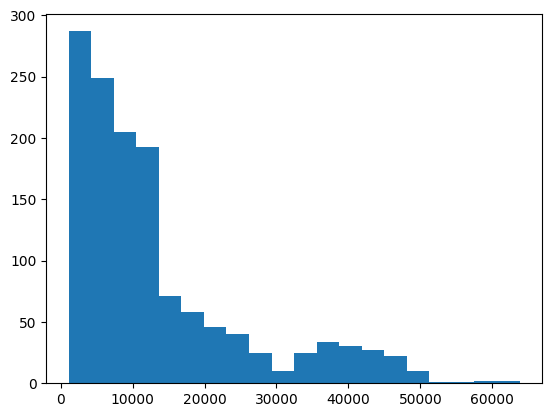

In [ ]:
plt.hist(original_dataset['charges'], bins=20)
plt.show()

## 1.3 Verificar outliers
A média de `charges` é de 13270, porém alguns valores estão muito distantes dessa média, sendo outliers, como podemos visualizar no boxplot abaixo.

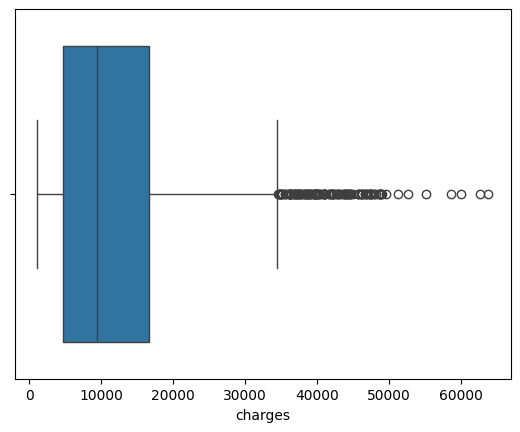

In [ ]:
sns.boxplot(x=original_dataset['charges'])
plt.show()

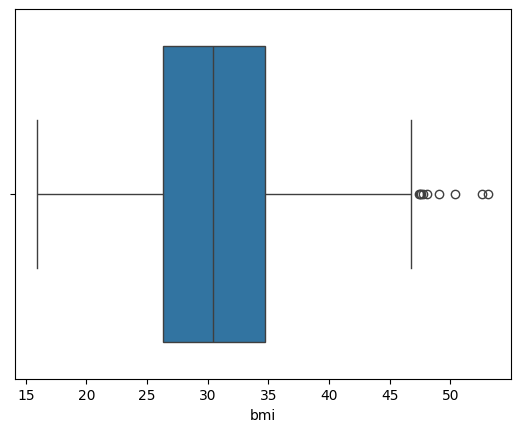

In [ ]:
sns.boxplot(x=original_dataset['bmi'])
plt.show()

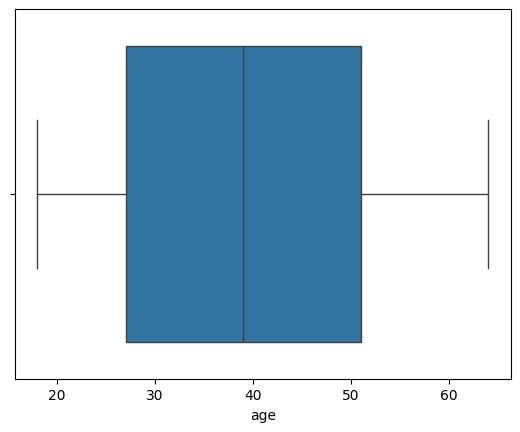

In [ ]:
sns.boxplot(x=original_dataset['age'])
plt.show()

### 1.3.1 Gerando um dataset tratando outliers

The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of  extreme value or outlier.

Vamos gerar um dataframe para tratar os outliers e depois comparar os modelos usando o dataframe original e o dataframe tratado.

In [ ]:
df_sem_outliers = original_dataset.copy()

O valor do skewness da charges, 1.5, indica a presença de valores extremos ou outliers.

In [ ]:
print('skewness value of charges: ',df_sem_outliers['charges'].skew())
print('skewness value of bmi: ',df_sem_outliers['bmi'].skew())
print('skewness value of age: ',df_sem_outliers['age'].skew())
print('skewness value of children: ',df_sem_outliers['children'].skew())

skewness value of charges:  1.5158796580240388
skewness value of bmi:  0.2840471105987448
skewness value of age:  0.05567251565299186
skewness value of children:  0.9383804401702414


In [ ]:
Q1=df_sem_outliers['charges'].quantile(0.25)
Q3=df_sem_outliers['charges'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

qtdoutliers = 0

for i in df_sem_outliers['charges']:
  if i < lower_whisker or i > upper_whisker:
    qtdoutliers += 1

df_sem_outliers['charges']=np.where(df_sem_outliers['charges']>upper_whisker,upper_whisker,np.where(df_sem_outliers['charges']<lower_whisker,lower_whisker,df_sem_outliers['charges']))

print('Quantidade de outliers: ',qtdoutliers)

Quantidade de outliers:  139


Temos a presença de 139 registros considerados outlier.

Substituimos os valores abaixo da banda inferior pelo valor minimo e os valores acima da banda superior pelo valor máximo.

In [ ]:
df_sem_outliers.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,12479.369251
std,14.049960,6.098187,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,34489.350562


<Axes: xlabel='charges'>

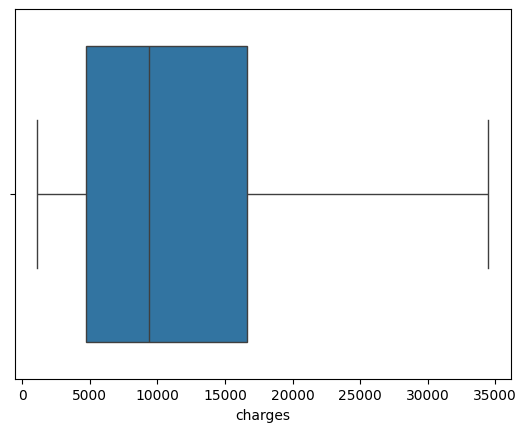

In [ ]:
sns.boxplot(x=df_sem_outliers['charges'])

## 1.4 Gráfico de matriz de correlação entre as *features* númericas (age, BMI, children) vs charges

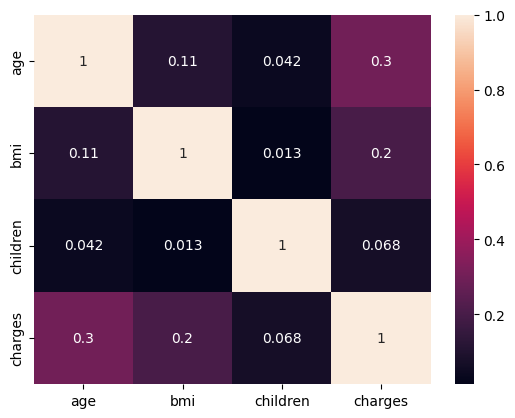

In [ ]:
numerical_features = ['age', 'bmi', 'children', 'charges']
correlation_matrix = original_dataset[numerical_features].corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True)
plt.show()

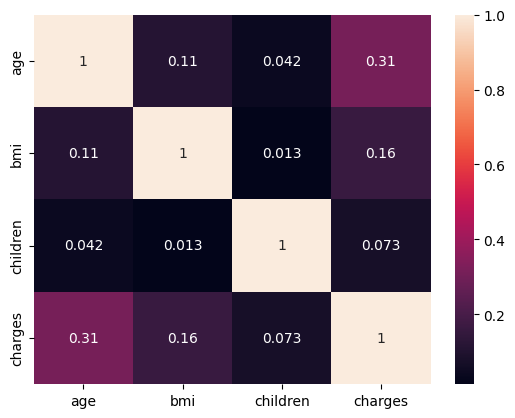

In [ ]:
numerical_features = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df_sem_outliers[numerical_features].corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 1.5 Analisar a distribuição de `charges` vs fumantes e não fumantes



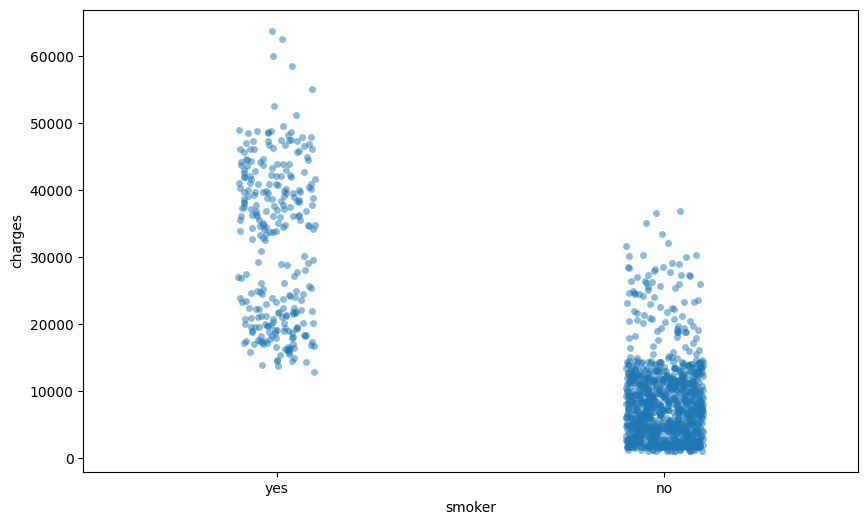

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=original_dataset, x="smoker", y="charges", alpha=0.5)
plt.show()

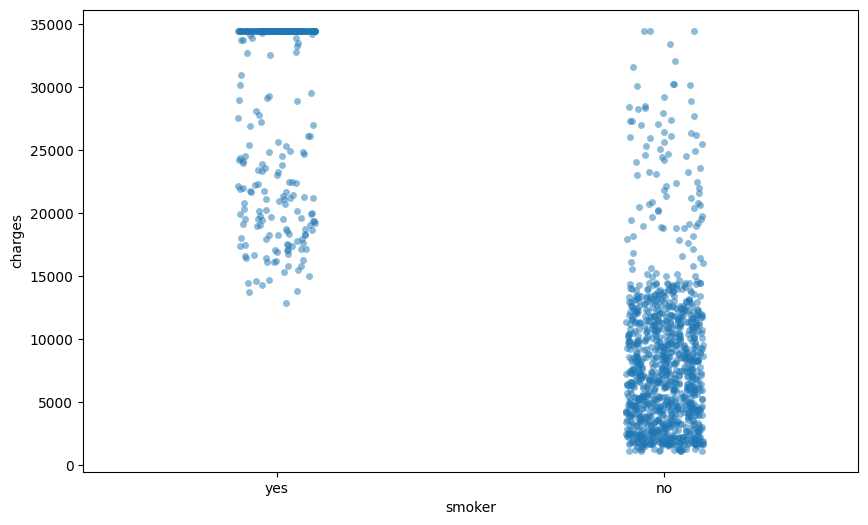

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_sem_outliers, x="smoker", y="charges", alpha=0.5)
plt.show()

## 1.6 Analisar a distribuição de `charges` vs homens e mulheres

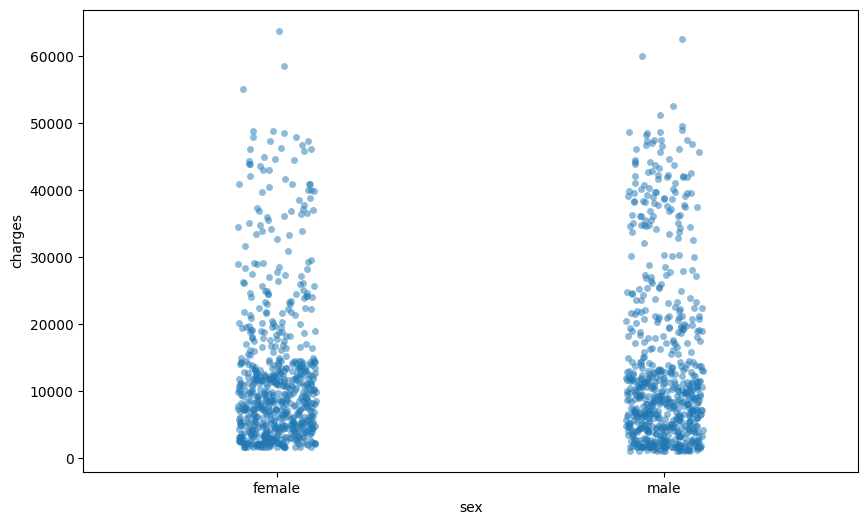

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=original_dataset, x="sex", y="charges", alpha=0.5)
plt.show()

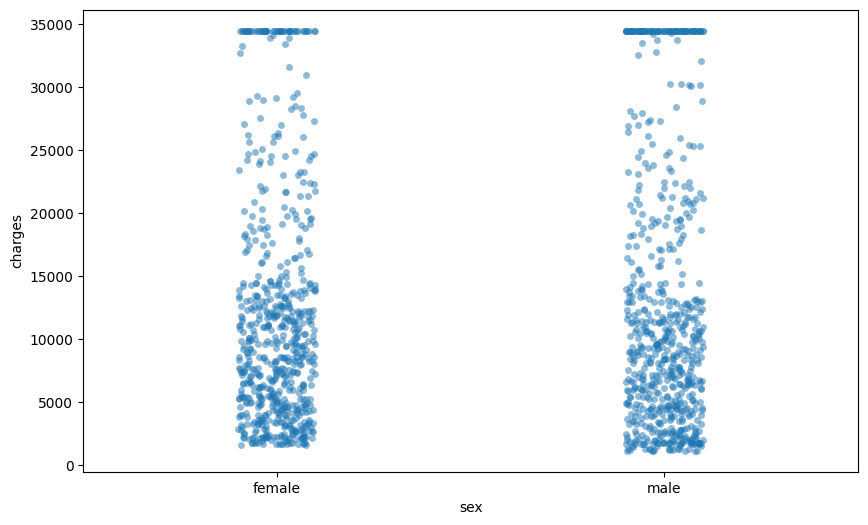

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_sem_outliers, x="sex", y="charges", alpha=0.5)
plt.show()

## 1.7 Analisar a distribuição de `charges` vs regiões

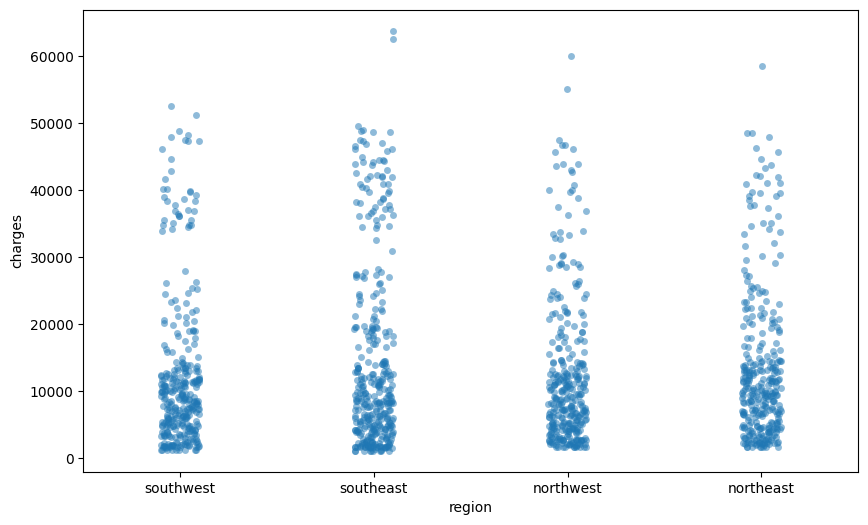

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=original_dataset, x="region", y="charges", alpha=0.5)
plt.show()

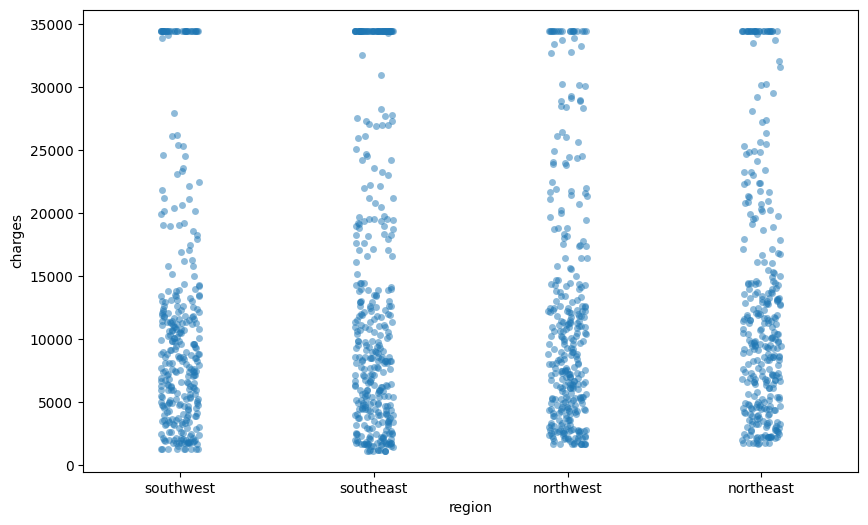

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_sem_outliers, x="region", y="charges", alpha=0.5)
plt.show()

## 1.8 Gráfico de distribuição entre variáveis numéricas (`BMI` e `age`) vs charges


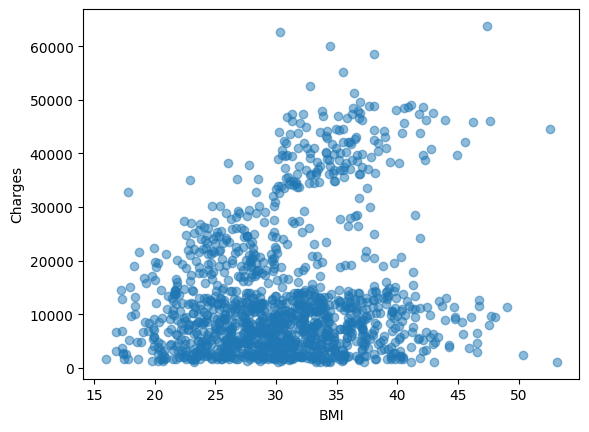

In [ ]:
plt.scatter(original_dataset['bmi'], original_dataset['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

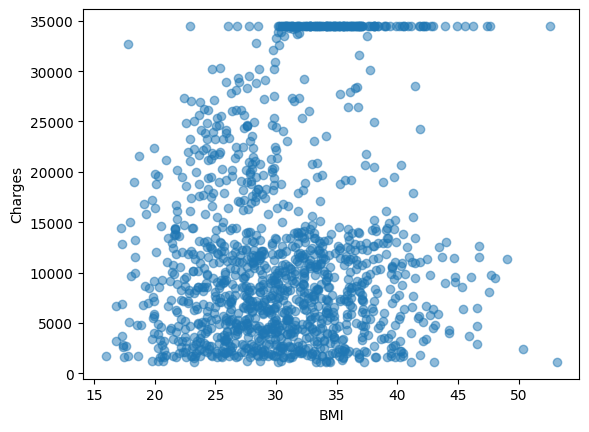

In [ ]:
plt.scatter(df_sem_outliers['bmi'], df_sem_outliers['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Os pontos de BMI estão dispostos de tal forma que é difícil imaginar uma reta linear.



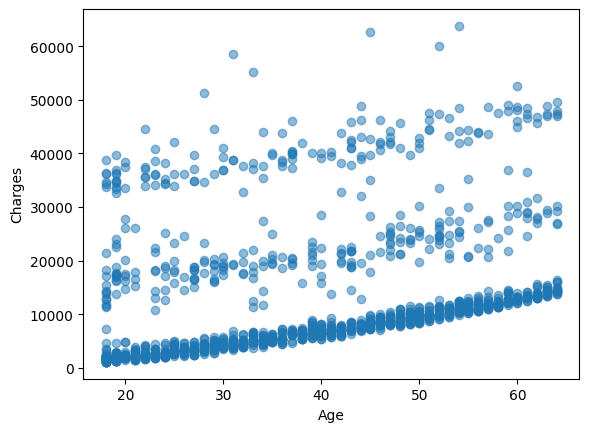

In [ ]:
plt.scatter(original_dataset['age'], original_dataset['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

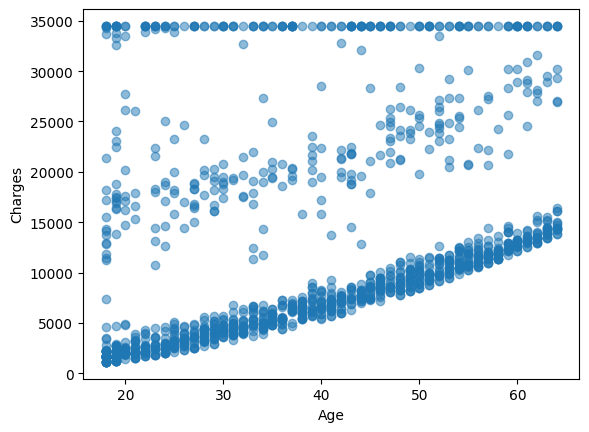

In [ ]:
plt.scatter(df_sem_outliers['age'], df_sem_outliers['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Verificamos uma certa linearidade entre a idade e os custos de plano de saúde.

# 2 Pré-processamento de dados:


## 2.1 Codificar as variáveis categóricas binárias `sex` e `smoker` usando LabelEncoder

In [ ]:
# Usar Label Encoder para tratar variáveis categóricas que possuem apenas dois tipos de categorias,
# como gênero, especialização e status, transformando em representação binária (valor 0 ou 1).
# Para as demais categorias, aplicar a técnica de one hot encoding.

dataset = original_dataset.copy()

colunas_label_encoder=['sex','smoker']

label_encoder = LabelEncoder()

for col in colunas_label_encoder:
    dataset[col] = label_encoder.fit_transform(dataset[col])
dataset.head() #visualizando o resultado com labelencoder

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### 2.1.1 Tratando o Dataframe sem outliers

In [ ]:
dataset_sem_outliers = df_sem_outliers.copy()

colunas_label_encoder=['sex','smoker']

label_encoder = LabelEncoder()

for col in colunas_label_encoder:
    dataset_sem_outliers[col] = label_encoder.fit_transform(dataset_sem_outliers[col])
dataset_sem_outliers.head() #visualizando o resultado com labelencoder

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## 2.2 Codificar a variável categórica `region` usando `OneHotEncoder`

`OneHotEncoder` é usado em machine learning para converter dados categóricos em um formato numérico que possa ser utilizado pelos modelos. Muitos algoritmos, como regressão logística, árvores de decisão ou redes neurais, funcionam melhor com dados numéricos de entrada. Aqui está o porquê de usá-lo:

* **Lidar com Dados Categóricos**: Muitos conjuntos de dados contêm características categóricas (como cor, tipo, cidade). Algoritmos de machine learning não podem trabalhar diretamente com esses valores categóricos.

* **Não Pressupõe Relação Ordinal**: Ao contrário do label encoding (codificação de rótulos), onde as categorias são atribuídas a números (por exemplo, vermelho = 1, azul = 2, verde = 3), o OneHotEncoder evita sugerir uma relação ordinal. Por exemplo, "azul" não é maior que "vermelho". Ele cria uma coluna binária para cada categoria.

* **Representação Binária**: O OneHotEncoder representa cada categoria como um vetor binário. Por exemplo:
Se houver três categorias: vermelho, azul, verde
A representação codificada em one-hot seria:
  * vermelho → [1, 0, 0]
  * azul → [0, 1, 0]
  * verde → [0, 0, 1]

* Evitar Viés: Ao converter categorias em formato binário, o OneHotEncoder impede que o modelo assuma que certas categorias são mais importantes ou que têm uma relação hierárquica.

In [ ]:
onehot_encoder = OneHotEncoder()
#onehot_categorical_features = ['region', 'sex', 'smoker']
onehot_categorical_features = ['region']

# encode column region in the format region_sourthwest, region_southeast, region_northwest, region_northeast
onehot_encoded = onehot_encoder.fit_transform(dataset[onehot_categorical_features]).toarray()
onehot_encoded = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_categorical_features))
dataset = pd.concat([dataset, onehot_encoded], axis=1)
dataset = dataset.drop(columns=onehot_categorical_features)
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


### 2.2.1 Tratando o Dataframe sem outliers

In [ ]:
onehot_encoder = OneHotEncoder()
#onehot_categorical_features = ['region', 'sex', 'smoker']
onehot_categorical_features = ['region']

# encode column region in the format region_sourthwest, region_southeast, region_northwest, region_northeast
onehot_encoded = onehot_encoder.fit_transform(dataset_sem_outliers[onehot_categorical_features]).toarray()
onehot_encoded = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_categorical_features))
dataset_sem_outliers = pd.concat([dataset_sem_outliers, onehot_encoded], axis=1)
dataset_sem_outliers = dataset_sem_outliers.drop(columns=onehot_categorical_features)
dataset_sem_outliers.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


## 2.3 Matriz de correlação incluindo as variáveis categóricas

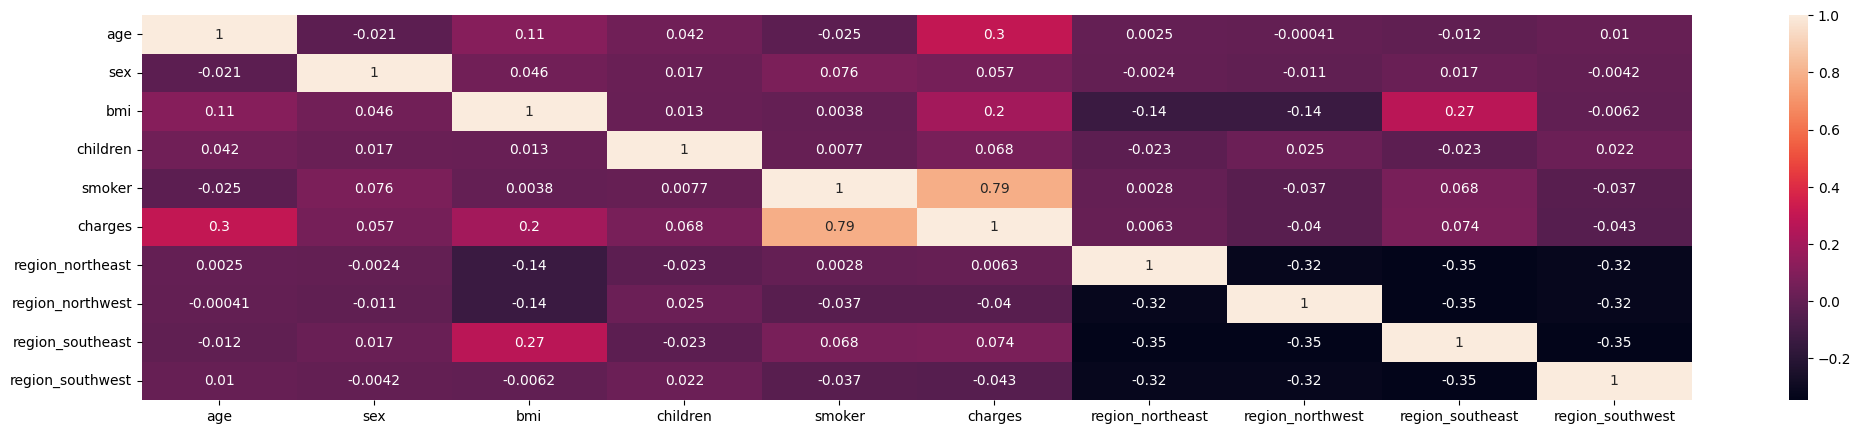

In [ ]:
plt.figure(figsize=(25, 5))
correlation_matrix = dataset.corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True)
plt.show()

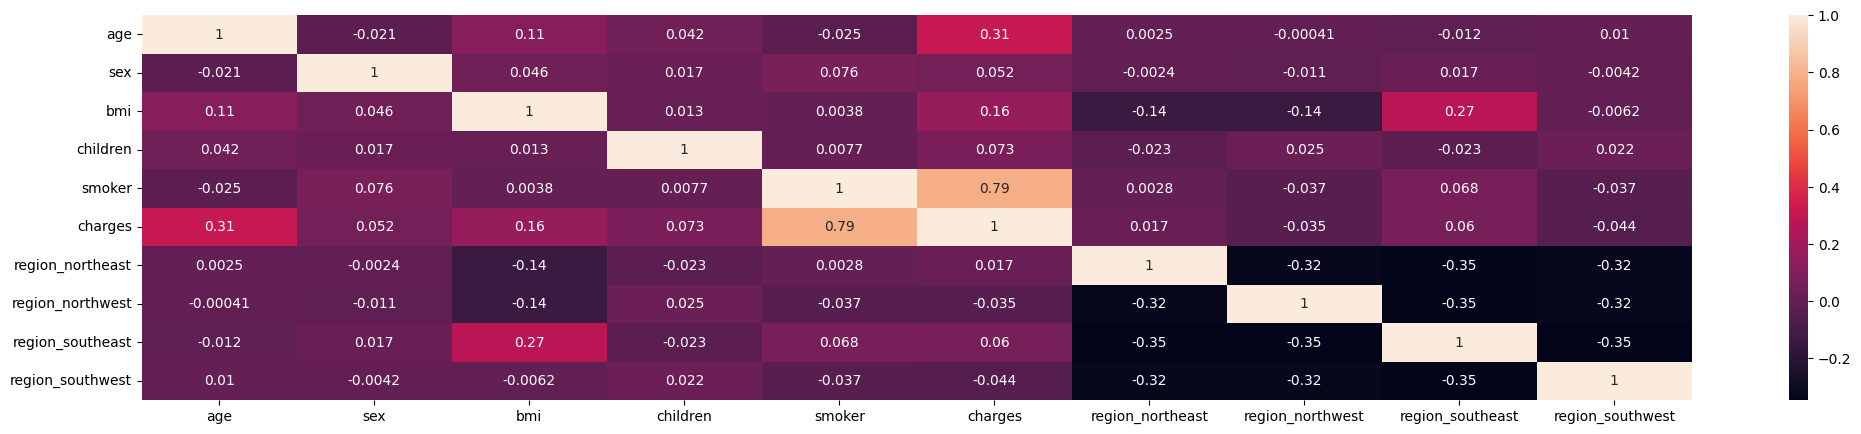

In [ ]:
plt.figure(figsize=(25, 5))
correlation_matrix = dataset_sem_outliers.corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True)
plt.show()

# 3 Modelagem, Treinamento e Avaliação do Modelo e Validação Estatística

## 3.1 Divisão das bases de treino e teste

In [ ]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
#X = dataset.drop(columns=['charges']) # Variáveis características
X = dataset[features] # Variáveis características
#testando = dataset[features].values
y = dataset['charges'] # O que eu quero prever.

In [ ]:
# SEM OUTLIERS
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
X_so = dataset_sem_outliers[features] # Variáveis características
y_so = dataset_sem_outliers['charges'] # O que eu quero prever.

In [ ]:
y.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
y_so.describe()

,charges
count,1338.000000
mean,12479.369251
std,10158.056096
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,34489.350562


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(X_so, y_so, test_size=0.2, random_state=42)

In [ ]:
# Verificar a distribuição
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

In [ ]:
# Verificar a distribuição
X_train_so.shape, X_test_so.shape, y_train_so.shape, y_test_so.shape

((1070, 9), (268, 9), (1070,), (268,))

In [ ]:
print(len(X_train), "treinamento +", len(X_test), "teste")

1070 treinamento + 268 teste


## 3.2 Padronizar base de treino
Padronizar as variáveis para que as variáveis com magnitudes mais elevadas não distorçam a análise.

Mas você deve estar se perguntando:

“por que é realizado o escalonamento (fit) na base treino e não na base de teste?”.

Bem, realizamos a transformação do escalonamento na base de treino para evitar que a base de teste fique exatamente igual às estatísticas da base de treino, o que evita “vazamento” desses dados. A base de teste em geral deve representar uma base de dados nunca vista antes pelo algoritmo, justamente para testar se o algoritmo consegue generalizar os dados.

A padronização não vincula valores específicos nos mínimos e máximos, o que pode ser um ponto de atenção em alguns algoritmos (por exemplo, redes neurais). No entanto, a padronização é muito menos afetada por outliers. Na biblioteca do Scikit-Learn temos a padronização em StandardScaler.

In [ ]:
scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

scaler.fit(X_train)# qual média e std será utilizado para o escalonamento
#x_padronizado = scaler.fit_transform(X)

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [ ]:
# SO
scaler2 = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

scaler2.fit(X_train_so)# qual média e std será utilizado para o escalonamento
#x_padronizado = scaler.fit_transform(X)

x_train_so_standard_scaled = scaler2.transform(X_train_so)
x_test_so_standard_scaled  = scaler2.transform(X_test_so)

In [ ]:
x_train_standard_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.0246016 , -1.03308239, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -1.0246016 , -0.94368672, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139, -1.0246016 ,  2.82086429, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 ,  0.97598911, -0.10932713, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [ ]:
type(x_train_standard_scaled)

numpy.ndarray

## 3.3 Funções para validação de modelos

In [ ]:
dados_validacao_modelos = []

# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

# Função validadora para Modelo de Regressão
def validar_modelo_Regressao(y_test, predictions, modelo):
  erro_medio_quadratico = np.sqrt(mean_squared_error(y_test, predictions))
  #rmse = np.sqrt(mean_squared_error(y_test, predictions))
  erro_absoluto_medio = mean_absolute_error(y_test, predictions)
  r_quadrado = r2_score(y_test, predictions)

  # Calcular o MAPE
  mape_result = calculate_mape(y_test, predictions)

  # Imprimir o resultado
  print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
  print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
  print(f'R² (coeficiente de determinação): {r_quadrado}')
  print(f"O MAPE é: {mape_result:.2f}%")

  # Adicionando info no array
  dados_validacao_modelos.append({
      'modelo': modelo,
      'erro_medio_quadratico': erro_medio_quadratico,
      'erro_absoluto_medio': erro_absoluto_medio,
      'r_quadrado': r_quadrado,
      'MAPE': mape_result
  })

In [ ]:
def grafico_comparativo(X_test, y_test, predictions, titulo):
  plt.scatter(X_test["age"], y_test, label='Real')
  plt.scatter(X_test["age"], predictions, label='Previsto', color='red')
  plt.xlabel("Age")
  plt.ylabel("Estimated charge ($)")
  plt.title(titulo)
  plt.legend()
  plt.show()

In [ ]:
def grafico_comparativo_2(x, y, titulo, xlabel, ylabel):
  x = np.array(x)
  y = np.array(y)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.xticks(rotation=90)

  plt.bar(x,y)
  plt.show()

In [ ]:
def grafico_comparativo_3(x, y, titulo, xlabel, ylabel):
  x = np.array(x)
  y = np.array(y)

  plt.barh(x, y)

  # setting label of y-axis
  plt.ylabel(xlabel)

  # setting label of x-axis
  plt.xlabel(ylabel)
  plt.title(titulo)
  plt.show()

## 3.4 Aplicando Modelos Preditivos

### 3.4.1 Regressão Linear (Sem Padronização)

In [ ]:
###################################################################### Regressão Linear
# TESTANDO sem standardscale
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

validar_modelo_Regressao(y_test, predictions, 'RL')

Erro Médio Quadrático: 5796.284659276272
Erro Absoluto Médio: 4181.194473753641
R² (coeficiente de determinação): 0.7835929767120724
O MAPE é: 46.89%


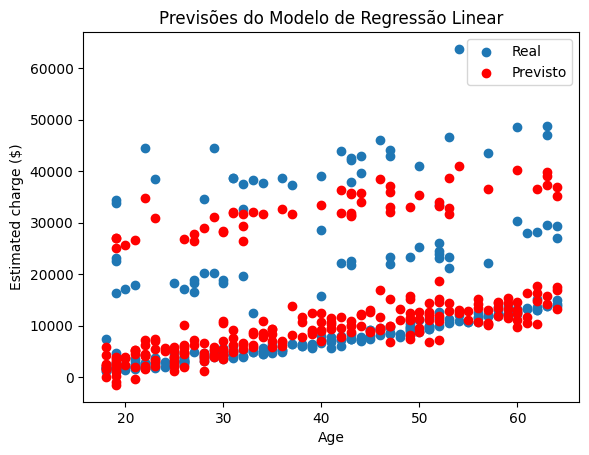

In [ ]:
grafico_comparativo(X_test, y_test, predictions, 'Previsões do Modelo de Regressão Linear')

In [ ]:
# SO
lin_reg.fit(X_train_so, y_train_so)

predictions = lin_reg.predict(X_test_so)

validar_modelo_Regressao(y_test_so, predictions, 'RL_so')

Erro Médio Quadrático: 4834.511797031141
Erro Absoluto Médio: 3306.783088364067
R² (coeficiente de determinação): 0.7846973606582192
O MAPE é: 41.67%


In [ ]:
scores = cross_val_score(lin_reg, X_so, y, cv=5, scoring='r2')
print(scores.mean())

0.7468616243473741


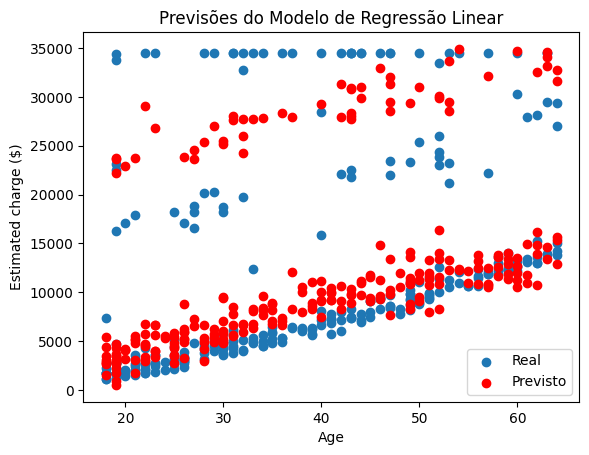

In [ ]:
grafico_comparativo(X_test_so, y_test_so, predictions, 'Previsões do Modelo de Regressão Linear')

### 3.4.2 Regressão Linear (Com Padronização)

In [ ]:
# TESTANDO com standardscale
lin_reg.fit(x_train_standard_scaled, y_train)

predictions = lin_reg.predict(x_test_standard_scaled)

validar_modelo_Regressao(y_test, predictions, 'RL-P')

Erro Médio Quadrático: 5839.439407470053
Erro Absoluto Médio: 4229.396712955313
R² (coeficiente de determinação): 0.7803585751338581
O MAPE é: 49.08%


Em resumo, LinearRegression não é um bom modelo para os dados que temos. E o resultado com o conjunto padronizado com StandardScaler teve um resultado pior ainda. Erro médio de $4181  sem e  $4254 com.

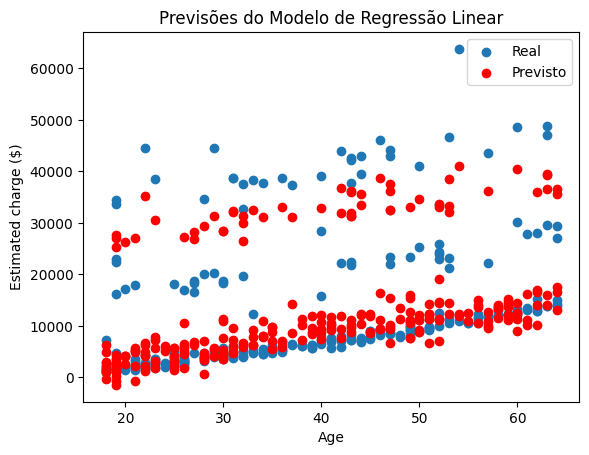

In [ ]:
grafico_comparativo(X_test, y_test, predictions, 'Previsões do Modelo de Regressão Linear')

In [ ]:
# SO
lin_reg.fit(x_train_so_standard_scaled, y_train_so)

predictions = lin_reg.predict(x_test_so_standard_scaled)

validar_modelo_Regressao(y_test_so, predictions, 'RL-P_so')

Erro Médio Quadrático: 4860.9342365545845
Erro Absoluto Médio: 3330.4387405033663
R² (coeficiente de determinação): 0.782337508417406
O MAPE é: 42.97%


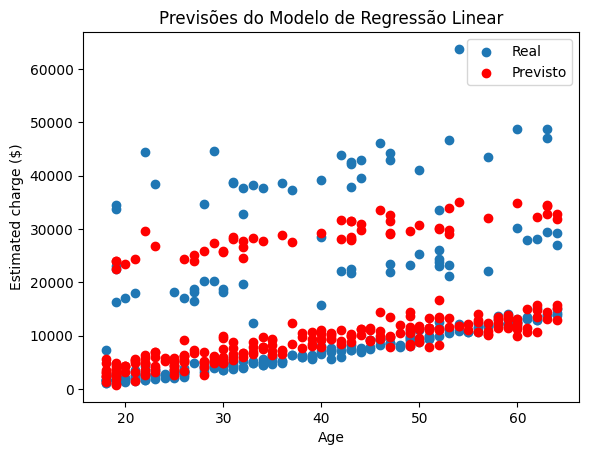

In [ ]:
grafico_comparativo(X_test, y_test, predictions, 'Previsões do Modelo de Regressão Linear')

### 3.4.3 Decision Tree (Sem Padronização)

In [ ]:
###################################################################### Decision Tree
# TESTANDO sem standardscale
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(X_train, y_train)

predictions_dtr = model_dtr.predict(X_test)
validar_modelo_Regressao(y_test, predictions_dtr, 'DT')


Erro Médio Quadrático: 6138.322508087093
Erro Absoluto Médio: 3042.654012053349
R² (coeficiente de determinação): 0.757299123469584
O MAPE é: 35.90%


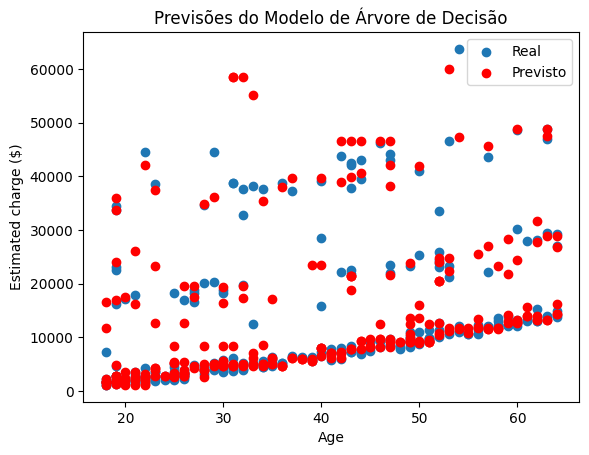

In [ ]:
grafico_comparativo(X_test, y_test, predictions_dtr, 'Previsões do Modelo de Árvore de Decisão')

In [ ]:
# SO
model_dtr.fit(X_train_so, y_train_so)

predictions_dtr = model_dtr.predict(X_test_so)
validar_modelo_Regressao(y_test_so, predictions_dtr, 'DT_so')

Erro Médio Quadrático: 5273.211928419868
Erro Absoluto Médio: 2391.7294229311046
R² (coeficiente de determinação): 0.7438498840794467
O MAPE é: 33.77%


### 3.4.4 Decision Tree (Com Padronização)

In [ ]:
# TESTANDO com standardscale
model_dtr.fit(x_train_standard_scaled, y_train)

predictions_dtr = model_dtr.predict(x_test_standard_scaled)
validar_modelo_Regressao(y_test, predictions_dtr, 'DT-P')

Erro Médio Quadrático: 6525.511773743878
Erro Absoluto Médio: 3111.349533284337
R² (coeficiente de determinação): 0.7257156081077134
O MAPE é: 38.66%


Em resumo, DecisionTreeRegressor não é um bom modelo para os dados que temos. E o resultado com o conjunto padronizado com StandardScaler teve um resultado pior ainda. Erro médio de $2937 sem e  $3144 com.

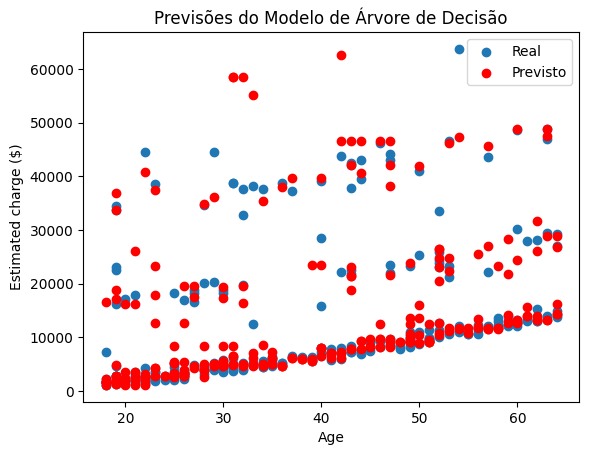

In [ ]:
grafico_comparativo(X_test, y_test, predictions_dtr, 'Previsões do Modelo de Árvore de Decisão')

In [ ]:
# SO
model_dtr.fit(x_train_standard_scaled, y_train)

predictions_dtr = model_dtr.predict(x_test_standard_scaled)
validar_modelo_Regressao(y_test, predictions_dtr, 'DT-P_so')

Erro Médio Quadrático: 6435.426330922867
Erro Absoluto Médio: 3127.9521068179192
R² (coeficiente de determinação): 0.7332363899995544
O MAPE é: 42.62%


### 3.4.5 KNN (Sem Padronização)

In [ ]:
###################################################################### KNeighborsRegressor
# TESTANDO sem standardscale
# Criar um modelo KNN com k=3
modeloKNN = KNeighborsRegressor(n_neighbors=3) # Changed to KNeighborsRegressor

# Treinar o modelo
modeloKNN.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes_knn = modeloKNN.predict(X_test)
validar_modelo_Regressao(y_test, previsoes_knn, 'KNN')


Erro Médio Quadrático: 11328.753272600468
Erro Absoluto Médio: 7143.098568747513
R² (coeficiente de determinação): 0.17332238738287842
O MAPE é: 79.40%


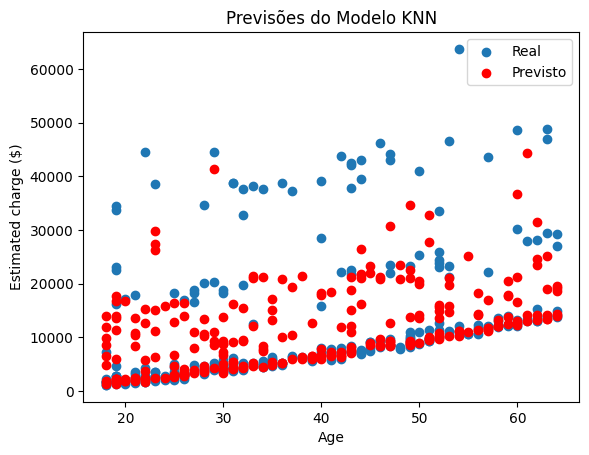

In [ ]:
grafico_comparativo(X_test, y_test, previsoes_knn, 'Previsões do Modelo KNN')

In [ ]:
# SO
# Treinar o modelo
modeloKNN.fit(X_train_so, y_train_so)

# Fazer previsões no conjunto de teste
previsoes_knn = modeloKNN.predict(X_test_so)
validar_modelo_Regressao(y_test_so, previsoes_knn, 'KNN_so')

Erro Médio Quadrático: 9350.432682274411
Erro Absoluto Médio: 6150.790506968905
R² (coeficiente de determinação): 0.1946076115018308
O MAPE é: 73.29%


### 3.4.6 KNN (Com Padronização)

In [ ]:
# TESTANDO com standardscale
# Treinar o modelo
modeloKNN.fit(x_train_standard_scaled, y_train)

# Fazer previsões no conjunto de teste
previsoes_knn = modeloKNN.predict(x_test_standard_scaled)
validar_modelo_Regressao(y_test, previsoes_knn, 'KNN-P')

Erro Médio Quadrático: 5544.642271022651
Erro Absoluto Médio: 3443.064162628109
R² (coeficiente de determinação): 0.8019754646739883
O MAPE é: 43.46%


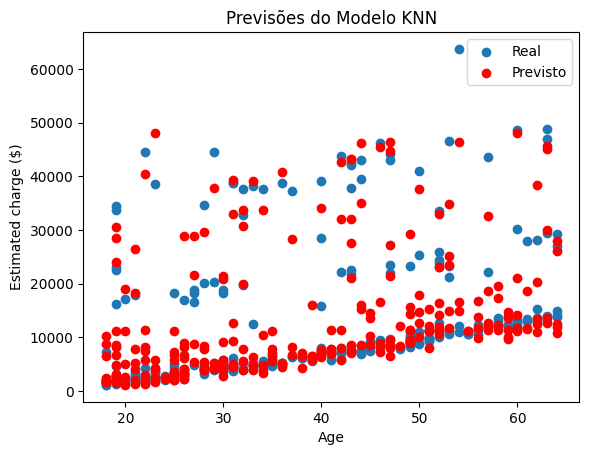

In [ ]:
grafico_comparativo(X_test, y_test, previsoes_knn, 'Previsões do Modelo KNN')

In [ ]:
# SO
modeloKNN.fit(x_train_so_standard_scaled, y_train_so)

# Fazer previsões no conjunto de teste
previsoes_knn = modeloKNN.predict(x_test_so_standard_scaled)
validar_modelo_Regressao(y_test_so, previsoes_knn, 'KNN-P_so')

Erro Médio Quadrático: 5216.399516421854
Erro Absoluto Médio: 3118.0872019222634
R² (coeficiente de determinação): 0.7493395603470097
O MAPE é: 42.70%


### 3.4.7 Gradient Boosting Regressor (Sem Padronização)

In [ ]:
###################################################################### Gradient Boosting Regressor
# TESTANDO sem standardscale
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, min_samples_split=2, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train.values.ravel())
gb_predictions = gb_model.predict(X_test)

validar_modelo_Regressao(y_test, gb_predictions, 'GB')

Erro Médio Quadrático: 4312.507384617903
Erro Absoluto Médio: 2455.8111180978976
R² (coeficiente de determinação): 0.8802069442778705
O MAPE é: 31.82%


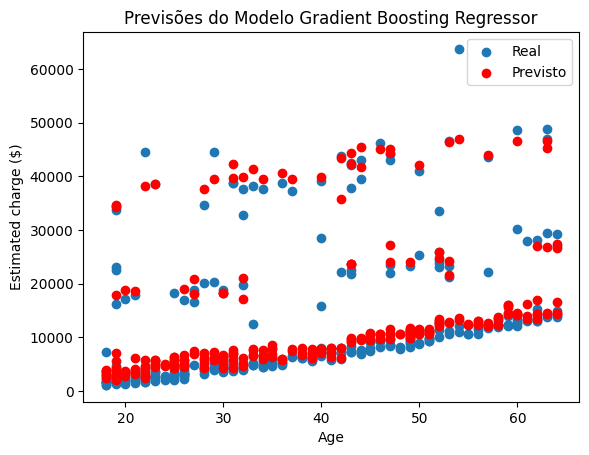

In [ ]:
grafico_comparativo(X_test, y_test, gb_predictions, 'Previsões do Modelo Gradient Boosting Regressor')

In [ ]:
# SO
gb_model.fit(X_train_so, y_train_so.values.ravel())
gb_predictions = gb_model.predict(X_test_so)

validar_modelo_Regressao(y_test_so, gb_predictions, 'GB_so')

Erro Médio Quadrático: 4059.863627086764
Erro Absoluto Médio: 2181.9219114971033
R² (coeficiente de determinação): 0.8481667121770251
O MAPE é: 30.71%


### 3.4.8 Gradient Boosting Regressor (Com Padronização)

In [ ]:
# TESTANDO com standardscale
#gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, min_samples_split=2, learning_rate=0.1, random_state=42)
gb_model.fit(x_train_standard_scaled, y_train.values.ravel())
gb_predictions = gb_model.predict(x_test_standard_scaled)

validar_modelo_Regressao(y_test, gb_predictions, 'GB-P')

Erro Médio Quadrático: 4312.507384617903
Erro Absoluto Médio: 2455.8111180978976
R² (coeficiente de determinação): 0.8802069442778705
O MAPE é: 31.82%


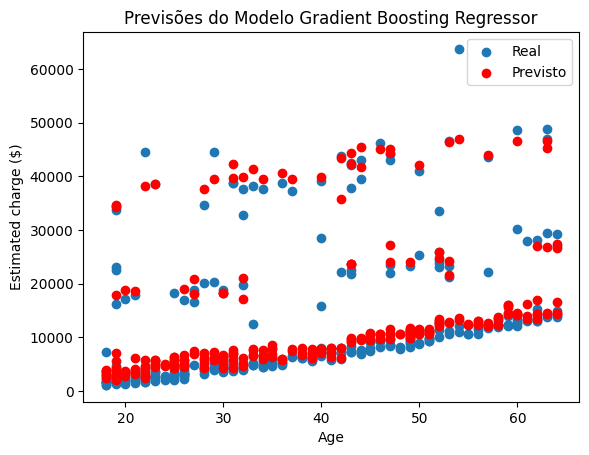

In [ ]:
grafico_comparativo(X_test, y_test, gb_predictions, 'Previsões do Modelo Gradient Boosting Regressor')

In [ ]:
# SO
gb_model.fit(x_train_so_standard_scaled, y_train_so.values.ravel())
gb_predictions = gb_model.predict(x_test_so_standard_scaled)

validar_modelo_Regressao(y_test_so, gb_predictions, 'GB-P_so')

Erro Médio Quadrático: 4059.863627086764
Erro Absoluto Médio: 2181.9219114971033
R² (coeficiente de determinação): 0.8481667121770251
O MAPE é: 30.71%


### 3.4.9 Random Forest Regressor (Sem Padronização)


In [ ]:
###################################################################### Random Forest Regressor
# TESTANDO sem standardscale
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)

validar_modelo_Regressao(y_test, rf_predictions, 'RFR')

Erro Médio Quadrático: 4432.752943043361
Erro Absoluto Médio: 2542.3045480649757
R² (coeficiente de determinação): 0.8734334350738269
O MAPE é: 31.57%


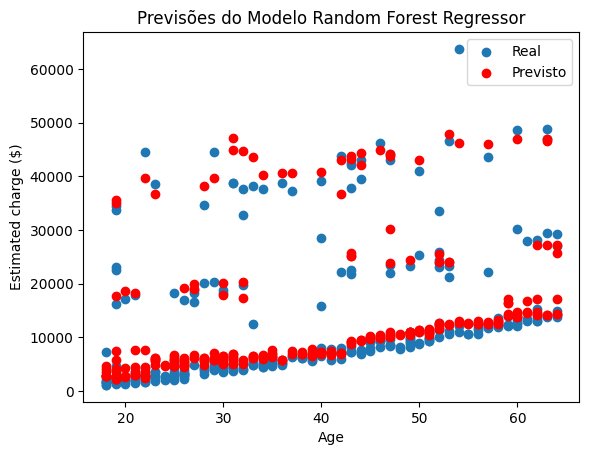

In [ ]:
grafico_comparativo(X_test, y_test, rf_predictions, 'Previsões do Modelo Random Forest Regressor')

In [ ]:
# SO
#rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
rf_model.fit(X_train_so, y_train_so.values.ravel())
rf_predictions = rf_model.predict(X_test_so)

validar_modelo_Regressao(y_test_so, rf_predictions, 'RFR_so')

Erro Médio Quadrático: 4072.8826934748467
Erro Absoluto Médio: 2166.8341601559937
R² (coeficiente de determinação): 0.8471913606402839
O MAPE é: 30.63%


### 3.4.10 Random Forest Regressor (Com Padronização)


In [ ]:
# TESTANDO com standardscale
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
rf_model.fit(x_train_standard_scaled, y_train.values.ravel())
rf_predictions2 = rf_model.predict(x_test_standard_scaled)

validar_modelo_Regressao(y_test, rf_predictions2, 'RFR-P')

Erro Médio Quadrático: 4434.136235847618
Erro Absoluto Médio: 2542.96031626228
R² (coeficiente de determinação): 0.8733544295716276
O MAPE é: 31.53%


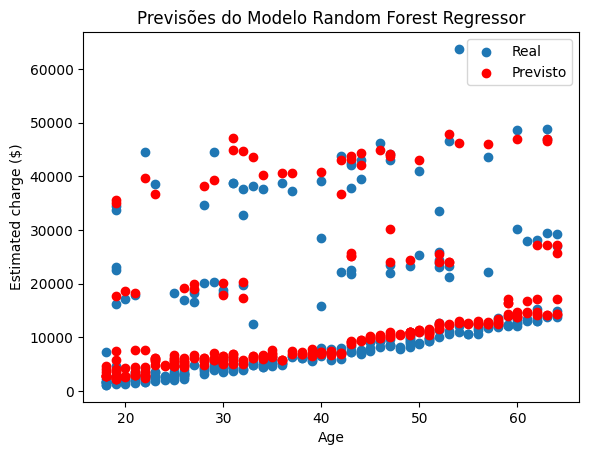

In [ ]:
grafico_comparativo(X_test, y_test, rf_predictions2, 'Previsões do Modelo Random Forest Regressor')

In [ ]:
# SO
#rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
rf_model.fit(x_train_so_standard_scaled, y_train_so.values.ravel())
rf_predictions = rf_model.predict(x_test_so_standard_scaled)

validar_modelo_Regressao(y_test_so, rf_predictions, 'RFR-P_so')

Erro Médio Quadrático: 4072.2251488840684
Erro Absoluto Médio: 2165.419305434248
R² (coeficiente de determinação): 0.8472406968922438
O MAPE é: 30.59%


### 3.4.9 Comparação Geral entre os Modelos

Avaliando os resultados ✅ Vamos avaliar o modelo com as seguintes métricas:

O RMSE é a raiz quadrada do **MSE** (Erro Quadrático Médio - Mean Squared Error). o MSE é a média dos quadrados das diferenças entre os valores reais e os valores previstos. O MSE mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados no conjunto de dados. Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados.
**O MSE nos diz a margem de erro em $.**

O **MAE** (Erro Médio Absoluto - Mean Absolute Error), onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O "R-squared (**R2**)" fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

o **MAPE** (Mean Absolute Percentage Error) mede a magnitude média do erro produzido por um modelo ou o quão distantes estão as previsões, em média. Um valor MAPE de 20% significa que a diferença percentual absoluta média entre as previsões e os valores reais é de 20%.

In [ ]:
# > melhor
df_resultados = pd.DataFrame(dados_validacao_modelos)
df_resultados.sort_values(by='r_quadrado', ascending=False, inplace=True)
df_resultados

,modelo,erro_medio_quadratico,erro_absoluto_medio,r_quadrado,MAPE
12,GB,4312.507385,2455.811118,0.880207,31.817812
14,GB-P,4312.507385,2455.811118,0.880207,31.817812
16,RFR,4432.752943,2542.304548,0.873433,31.571058
18,RFR-P,4434.136236,2542.960316,0.873354,31.531869
13,GB_so,4059.863627,2181.921911,0.848167,30.705836
15,GB-P_so,4059.863627,2181.921911,0.848167,30.705836
19,RFR-P_so,4072.225149,2165.419305,0.847241,30.589017
17,RFR_so,4072.882693,2166.834160,0.847191,30.633292
10,KNN-P,5544.642271,3443.064163,0.801975,43.464486
1,RL_so,4834.511797,3306.783088,0.784697,41.668109


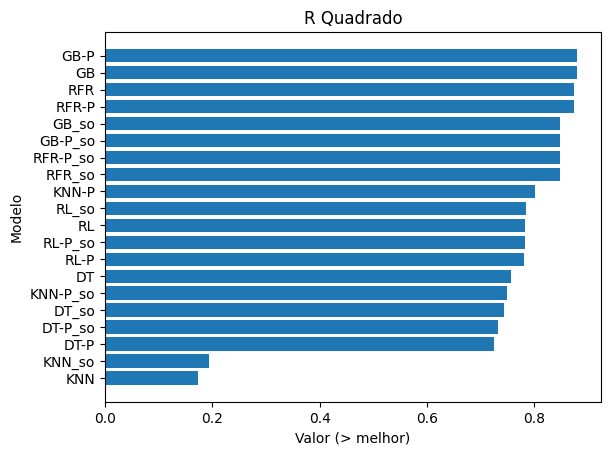

In [ ]:
df_resultados.sort_values(by='r_quadrado', ascending=True, inplace=True)
grafico_comparativo_3(df_resultados["modelo"], df_resultados["r_quadrado"], 'R Quadrado', 'Modelo', 'Valor (> melhor)')

In [ ]:
# < melhor
df_resultados.sort_values(by='erro_absoluto_medio', ascending=True, inplace=True)
df_resultados

,modelo,erro_medio_quadratico,erro_absoluto_medio,r_quadrado,MAPE
19,RFR-P_so,4072.225149,2165.419305,0.847241,30.589017
17,RFR_so,4072.882693,2166.834160,0.847191,30.633292
15,GB-P_so,4059.863627,2181.921911,0.848167,30.705836
13,GB_so,4059.863627,2181.921911,0.848167,30.705836
5,DT_so,5273.211928,2391.729423,0.743850,33.770811
14,GB-P,4312.507385,2455.811118,0.880207,31.817812
12,GB,4312.507385,2455.811118,0.880207,31.817812
16,RFR,4432.752943,2542.304548,0.873433,31.571058
18,RFR-P,4434.136236,2542.960316,0.873354,31.531869
4,DT,6138.322508,3042.654012,0.757299,35.904999


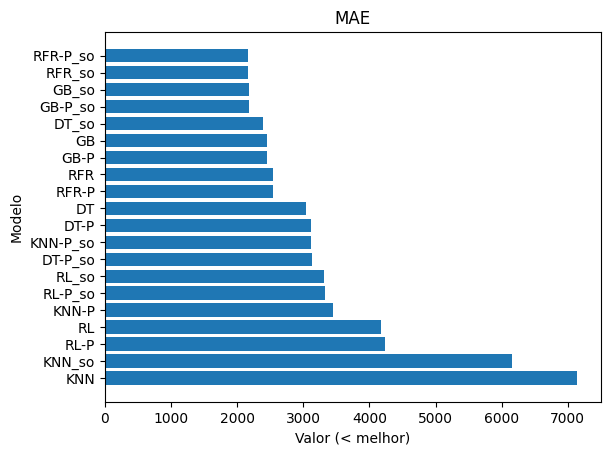

In [ ]:
df_resultados.sort_values(by='erro_absoluto_medio', ascending=False, inplace=True)
grafico_comparativo_3(df_resultados["modelo"], df_resultados["erro_absoluto_medio"], 'MAE', 'Modelo', 'Valor (< melhor)')

In [ ]:
# < melhor
df_resultados.sort_values(by='erro_medio_quadratico', ascending=True, inplace=True)
df_resultados

,modelo,erro_medio_quadratico,erro_absoluto_medio,r_quadrado,MAPE
13,GB_so,4059.863627,2181.921911,0.848167,30.705836
15,GB-P_so,4059.863627,2181.921911,0.848167,30.705836
19,RFR-P_so,4072.225149,2165.419305,0.847241,30.589017
17,RFR_so,4072.882693,2166.834160,0.847191,30.633292
14,GB-P,4312.507385,2455.811118,0.880207,31.817812
12,GB,4312.507385,2455.811118,0.880207,31.817812
16,RFR,4432.752943,2542.304548,0.873433,31.571058
18,RFR-P,4434.136236,2542.960316,0.873354,31.531869
1,RL_so,4834.511797,3306.783088,0.784697,41.668109
3,RL-P_so,4860.934237,3330.438741,0.782338,42.972958


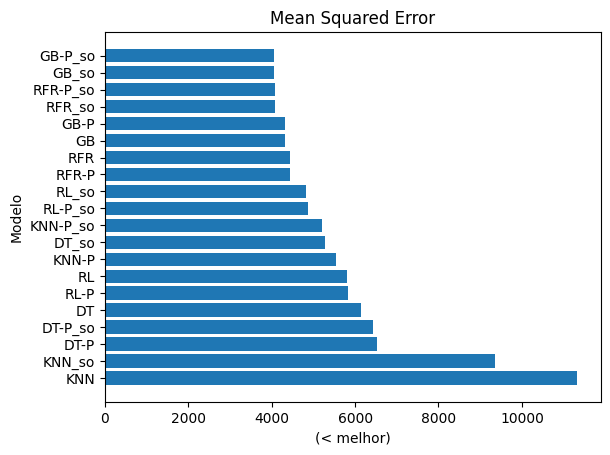

In [ ]:
df_resultados.sort_values(by='erro_medio_quadratico', ascending=False, inplace=True)
grafico_comparativo_3(df_resultados["modelo"], df_resultados["erro_medio_quadratico"], 'Mean Squared Error', 'Modelo', '(< melhor)')

In [ ]:
# < melhor
df_resultados.sort_values(by='MAPE', ascending=True, inplace=True)
df_resultados

,modelo,erro_medio_quadratico,erro_absoluto_medio,r_quadrado,MAPE
19,RFR-P_so,4072.225149,2165.419305,0.847241,30.589017
17,RFR_so,4072.882693,2166.834160,0.847191,30.633292
15,GB-P_so,4059.863627,2181.921911,0.848167,30.705836
13,GB_so,4059.863627,2181.921911,0.848167,30.705836
18,RFR-P,4434.136236,2542.960316,0.873354,31.531869
16,RFR,4432.752943,2542.304548,0.873433,31.571058
12,GB,4312.507385,2455.811118,0.880207,31.817812
14,GB-P,4312.507385,2455.811118,0.880207,31.817812
5,DT_so,5273.211928,2391.729423,0.743850,33.770811
4,DT,6138.322508,3042.654012,0.757299,35.904999


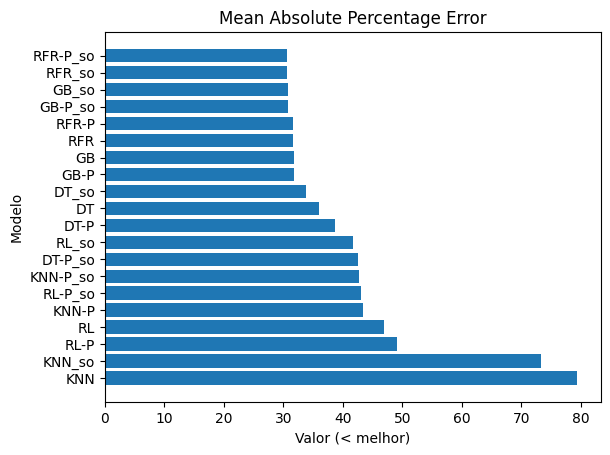

In [ ]:
df_resultados.sort_values(by='MAPE', ascending=False, inplace=True)
grafico_comparativo_3(df_resultados["modelo"], df_resultados["MAPE"], 'Mean Absolute Percentage Error', 'Modelo', 'Valor (< melhor)')

# **Relatório Final - Conclusão**
Fim das validações.
<br>
Como se trata de modelo de regressão, e não de classificação, não cabe validações como:
- AUC Score e Roc Curve
- Matriz de Confusão
- Acurácia
- Classification Report (precision, recall, f1-score, support)


**Conclusão**:
<br>
O melhor algoritmo dos testados foi o Gradient Boosting, a padronização dos dados não fez diferença.